In [3]:
import pandas as pd
import numpy as np

In [4]:
#folder = "C:\Users\SAHA\Documents\Git Repos\TimeSeries_ML"
#filename = "moving-closerfarcloser.csv"
data = pd.read_csv('moving-closerfarcloser.csv',sep='\s+',engine='python')
data.head()

,date_index,rsrp,rsrq,wbcqi,macStats_phr,dlCqiReport_sfnSn,macStats_totalBytesSdusDl,macStats_totalTbsUl,macStats_mcs1Ul,macStats_totalPduDl,...,pdcpStats_pktTxBytes,pdcpStats_pktRxAiat,pdcpStats_pktRxBytes,pdcpStats_pktTx,pdcpStats_pktTxW,pdcpStats_pktTxAiatW,pdcpStats_sfn,pdcpStats_pktTxAiat,rnti,quality
0,6532,-83,-2,15,40,12631,8376,859211,10,1534,...,25609,1226166,64624,71,0,0,1246934,1223769,20457,0
1,6531,-83,-2,15,40,12551,8376,859022,10,1534,...,25609,1226166,64624,71,0,0,1246884,1223769,20457,0
2,6530,-83,-2,15,40,12471,8376,858959,10,1534,...,25609,1226166,64624,71,0,0,1246834,1223769,20457,0
3,6529,-83,-2,15,40,12311,8376,858707,10,1534,...,25609,1226166,64624,71,0,0,1246734,1223769,20457,0
4,6528,-83,-2,15,40,12231,8374,858581,10,1533,...,25609,1226166,64624,71,0,0,1246684,1223769,20457,0


In [5]:
#drop columns with only 'zero' as value
data1 = data.loc[:, (data != 0).any(axis=0)]
#drop columns with constant values
data1 = data1.loc[:,data1.apply(pd.Series.nunique) != 1]
#data1=data.drop(['macStats_prbUl','pdcpStats_pktRxOo','rnti','quality'], axis=1)
data1.head()
#pdcpStats_pktRx, pdcpStats_pktTx, 

,date_index,rsrp,rsrq,wbcqi,macStats_phr,dlCqiReport_sfnSn,macStats_totalBytesSdusDl,macStats_totalTbsUl,macStats_mcs1Ul,macStats_totalPduDl,...,pdcpStats_pktTxBytesW,pdcpStats_pktTxSn,pdcpStats_pktTxBytes,pdcpStats_pktRxAiat,pdcpStats_pktRxBytes,pdcpStats_pktTx,pdcpStats_pktTxW,pdcpStats_pktTxAiatW,pdcpStats_sfn,pdcpStats_pktTxAiat
0,6532,-83,-2,15,40,12631,8376,859211,10,1534,...,0,13,25609,1226166,64624,71,0,0,1246934,1223769
1,6531,-83,-2,15,40,12551,8376,859022,10,1534,...,0,13,25609,1226166,64624,71,0,0,1246884,1223769
2,6530,-83,-2,15,40,12471,8376,858959,10,1534,...,0,13,25609,1226166,64624,71,0,0,1246834,1223769
3,6529,-83,-2,15,40,12311,8376,858707,10,1534,...,0,13,25609,1226166,64624,71,0,0,1246734,1223769
4,6528,-83,-2,15,40,12231,8374,858581,10,1533,...,0,13,25609,1226166,64624,71,0,0,1246684,1223769


In [6]:
data2=data1[['rsrp','rsrq','wbcqi','date_index']]
data2.head()

,rsrp,rsrq,wbcqi,date_index
0,-83,-2,15,6532
1,-83,-2,15,6531
2,-83,-2,15,6530
3,-83,-2,15,6529
4,-83,-2,15,6528


In [7]:
data2.corr()

,rsrp,rsrq,wbcqi,date_index
rsrp,1.000000,0.786645,0.807675,0.204227
rsrq,0.786645,1.000000,0.849339,0.113856
wbcqi,0.807675,0.849339,1.000000,0.029653
date_index,0.204227,0.113856,0.029653,1.000000


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 4 columns):
rsrp          6532 non-null int64
rsrq          6532 non-null int64
wbcqi         6532 non-null int64
date_index    6532 non-null int64
dtypes: int64(4)
memory usage: 204.2 KB


In [9]:
data2.nunique()

rsrp            46
rsrq            11
wbcqi           13
date_index    6532
dtype: int64

In [10]:
data2.describe()

,rsrp,rsrq,wbcqi,date_index
count,6532.000000,6532.000000,6532.000000,6532.000000
mean,-99.515922,-3.539804,13.085732,3266.500000
std,12.540239,2.078709,2.697702,1885.770311
min,-125.000000,-12.000000,0.000000,1.000000
25%,-109.000000,-5.000000,12.000000,1633.750000
50%,-101.000000,-2.000000,15.000000,3266.500000
75%,-83.000000,-2.000000,15.000000,4899.250000
max,-80.000000,-2.000000,15.000000,6532.000000


In [11]:
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
%matplotlib inline
init_notebook_mode(connected=True)

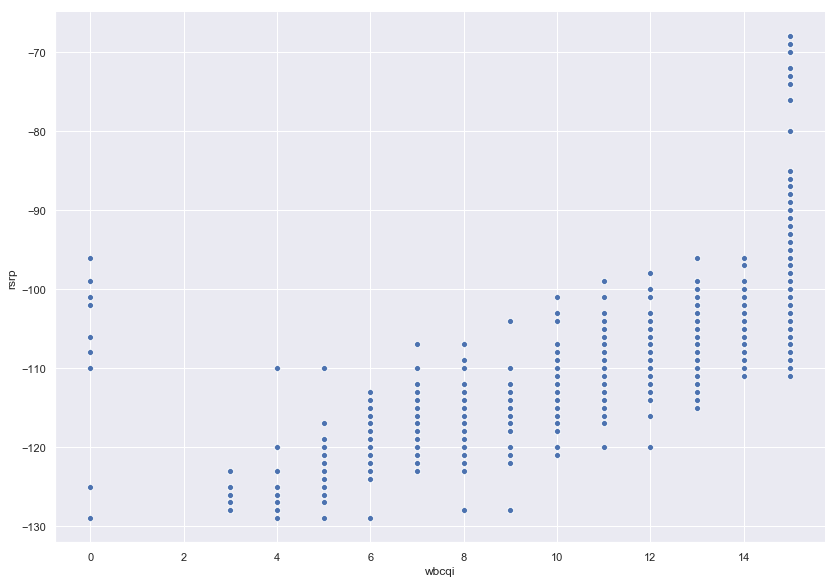

In [45]:
sns.pairplot(x_vars=['wbcqi'], y_vars=['rsrp'], data=data1,height=8.27, aspect=11.7/8.27)
#sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=data1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



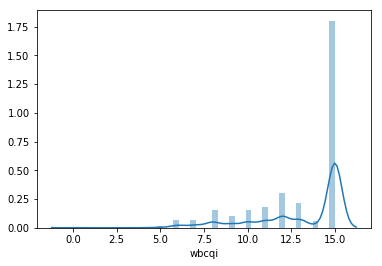

In [33]:
sns.distplot(data2['wbcqi'])

In [35]:
q_low = data1["wbcqi"].quantile(0.01)
q_hi  = data1["wbcqi"].quantile(0.99)
print(q_low,q_hi)

6.0 15.0


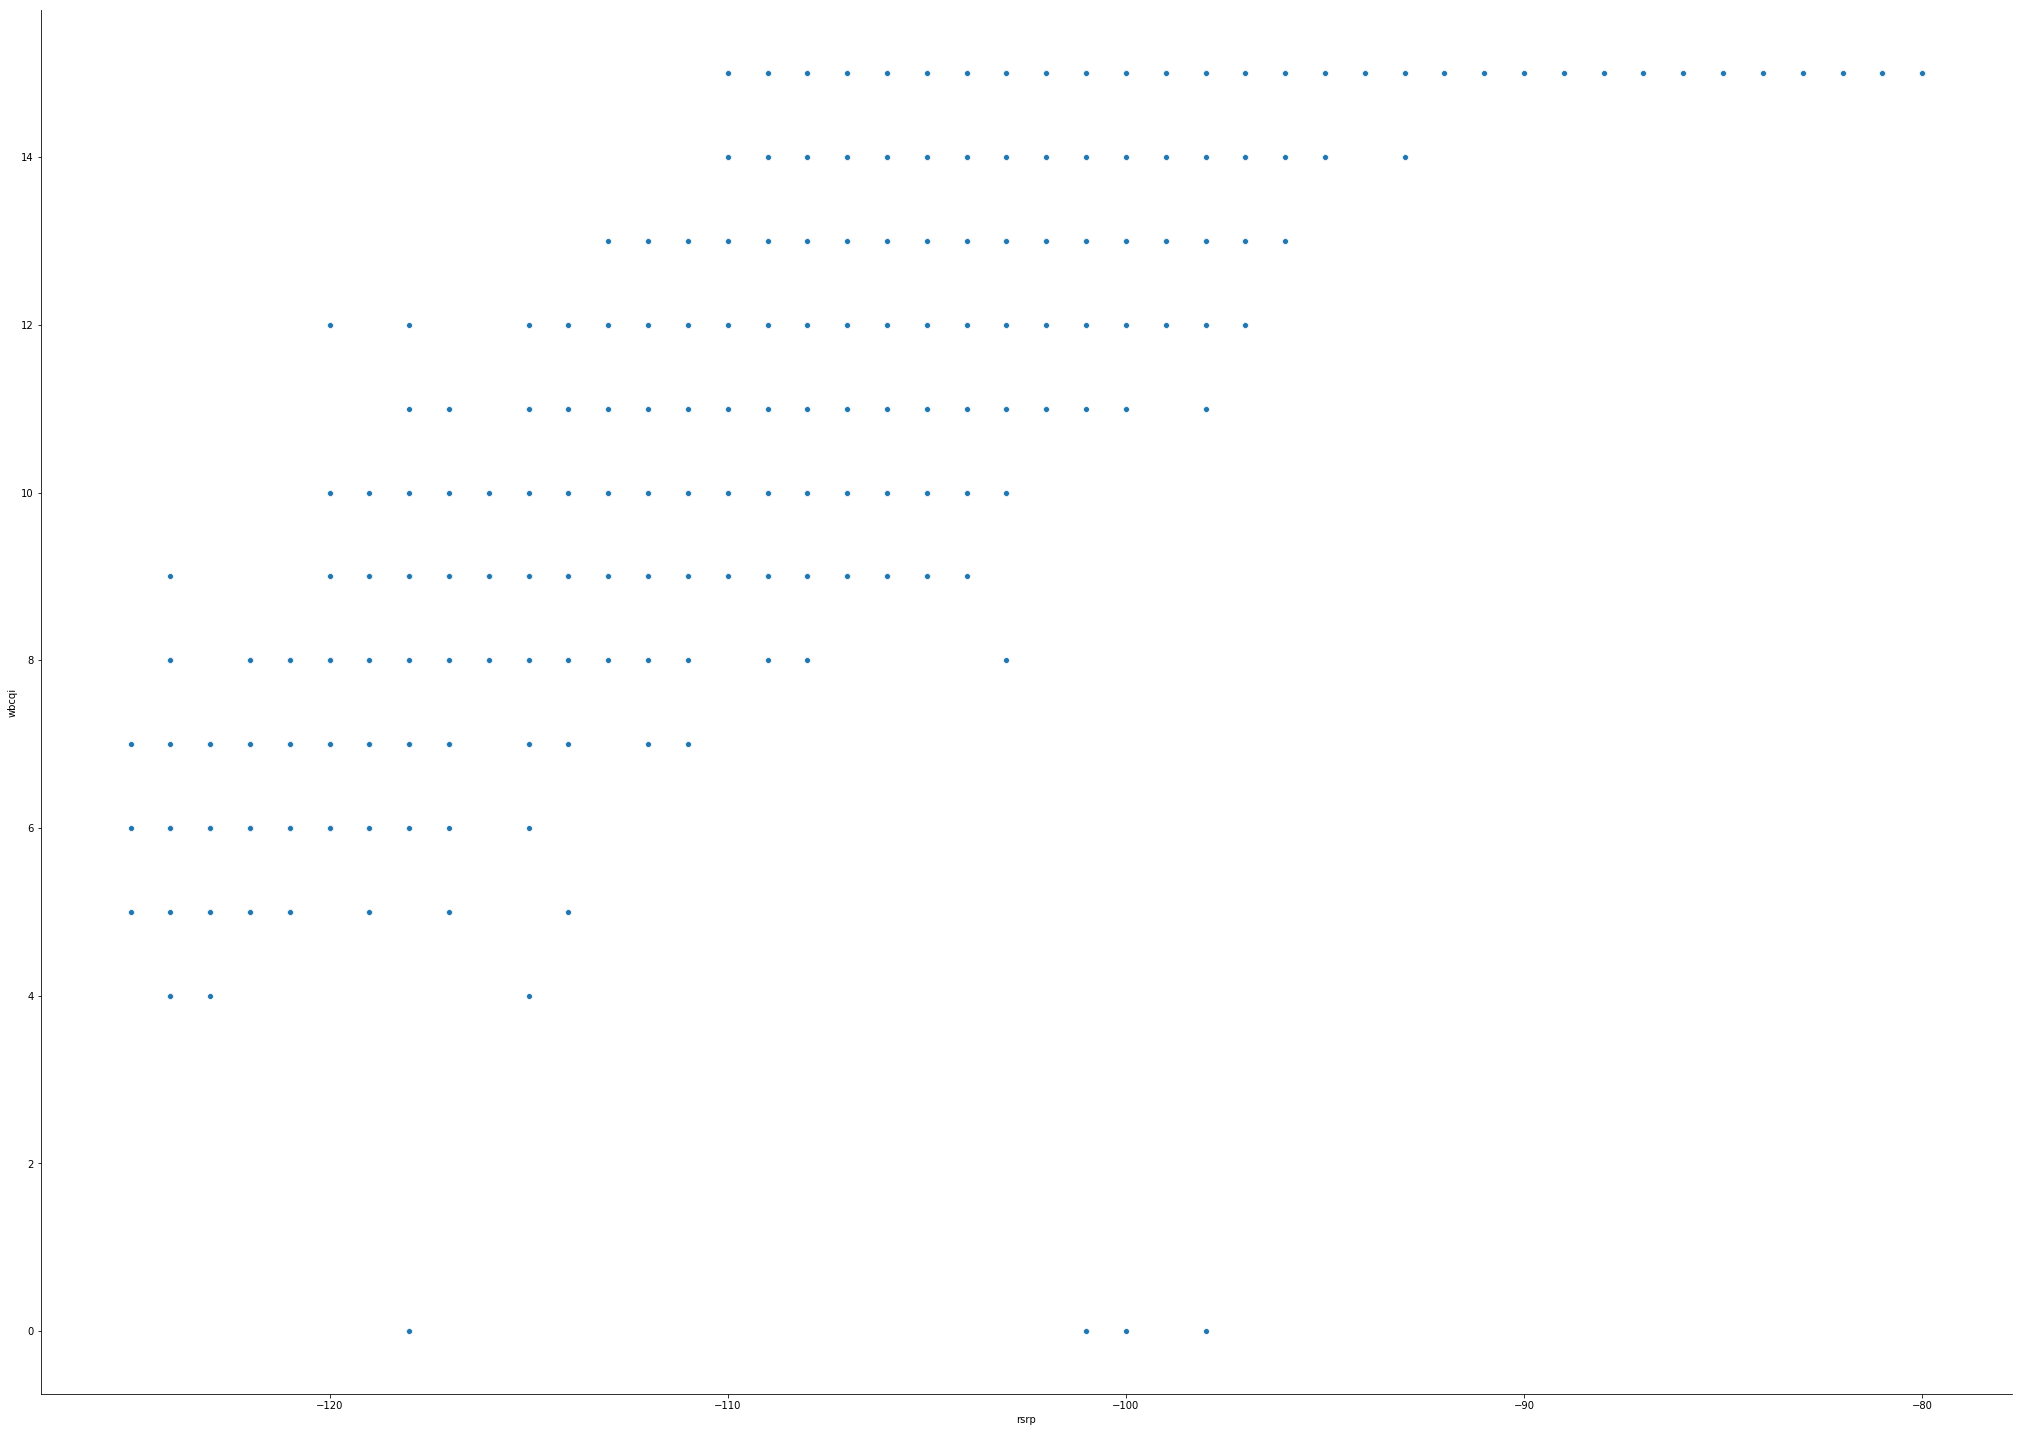

In [31]:
sns.pairplot(x_vars=['rsrp'], y_vars=['wbcqi'], data=data1,height=20, aspect=11.7/8.27)
#sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=data1)
plt.show()

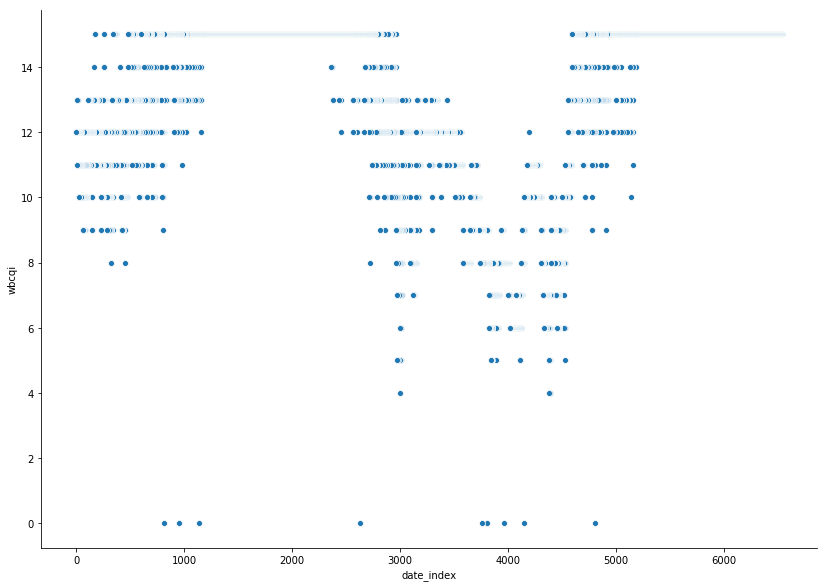

In [37]:
sns.pairplot(x_vars=['date_index'], y_vars=['wbcqi'], data=data1,height=8.27,aspect=11.7/8.27)
#sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=data1)
plt.show()

In [12]:
#replacing outliers, note that it can be seen that the wbcqi=0 is outside of the normal pattern. So we take it 
#as outlier and replace it with mean of wbcqi value in two neighboring rows
outlier_index=list(data2[data2['wbcqi']==0].index)
for i in outlier_index:
    data2.iloc[i]['wbcqi']=abs(0.5*(data2.iloc[i-1]['wbcqi']+data2.iloc[i+1]['wbcqi'] ))
    print(data2.iloc[i]['wbcqi'])
    

12
8
8
8
9
15
15
6
10
15


In [70]:

data2['wbcqi'].quantile(0.05)
#outlier_index2=list(data2[data2['wbcqi']==0].index)

8.0

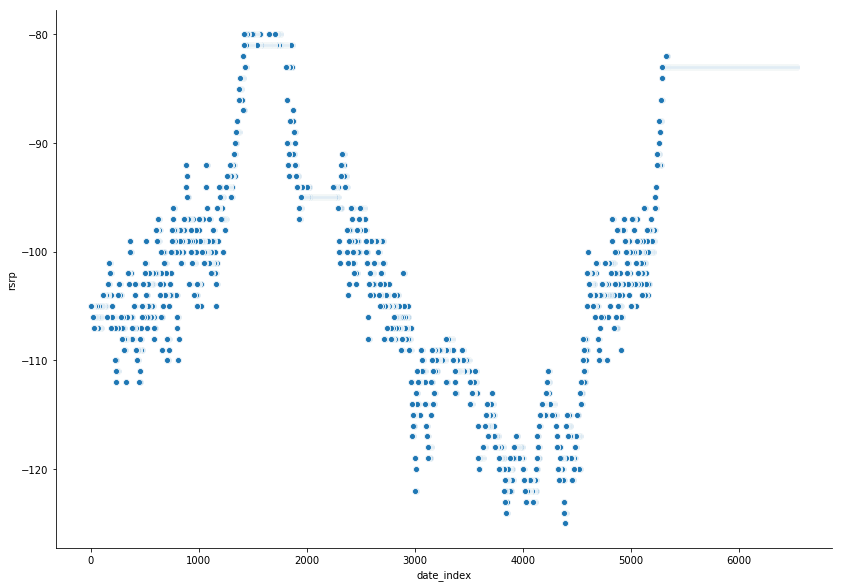

In [72]:
sns.pairplot(x_vars=['date_index'], y_vars=['rsrp'], data=data1,height=8.27,aspect=11.7/8.27)
#sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=data1)
plt.show()

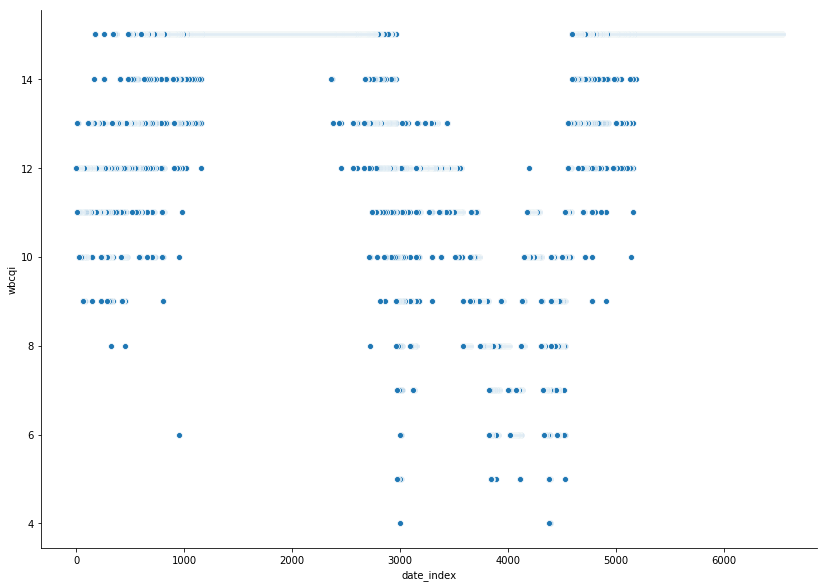

In [76]:
sns.pairplot(x_vars=['date_index'], y_vars=['wbcqi'], data=data2, height=8.27, aspect=11.7/8.27)
#sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=data1)
plt.show()

In [13]:
import math
i=list(data2[(data2.wbcqi == 6) & (data2.date_index <= 1000)].index)

data2.iloc[i[0]]['wbcqi']=math.ceil((data2.iloc[i[0]-1]['wbcqi']+data2.iloc[i[0]+1]['wbcqi'] )/2)
print(data2.iloc[i[0]]['wbcqi'])

12


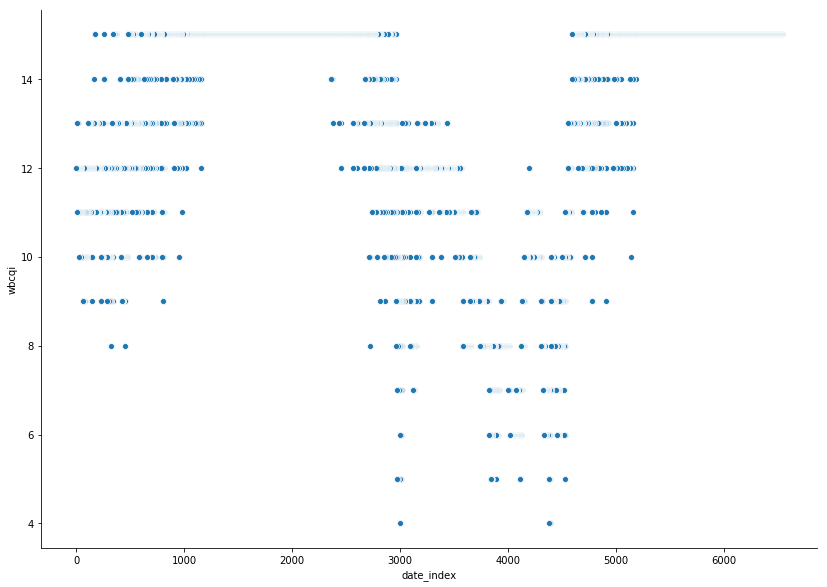

In [154]:
sns.pairplot(x_vars=['date_index'], y_vars=['wbcqi'], data=data2, height=8.27, aspect=11.7/8.27)
#sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=data1)
plt.show()

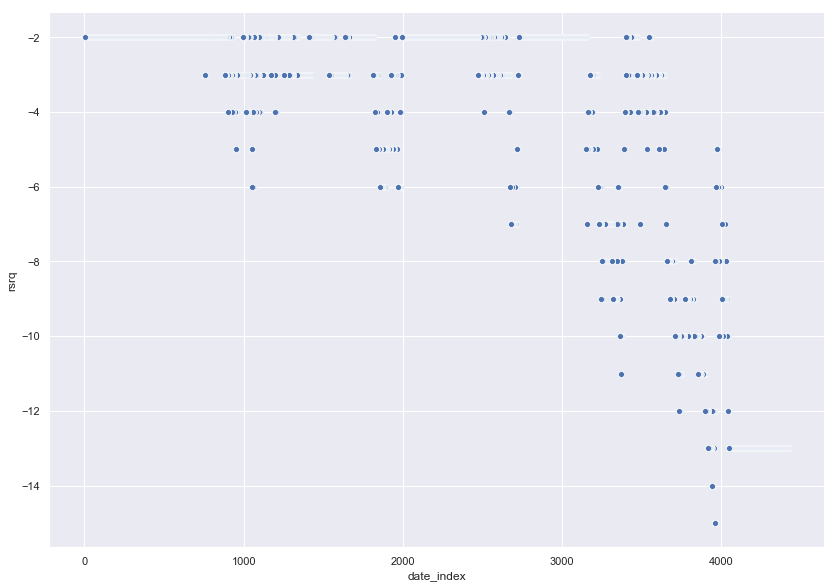

In [76]:
sns.pairplot(x_vars=['date_index'], y_vars=['rsrq'], data=data1,height=8.27, aspect=11.7/8.27)
plt.show()

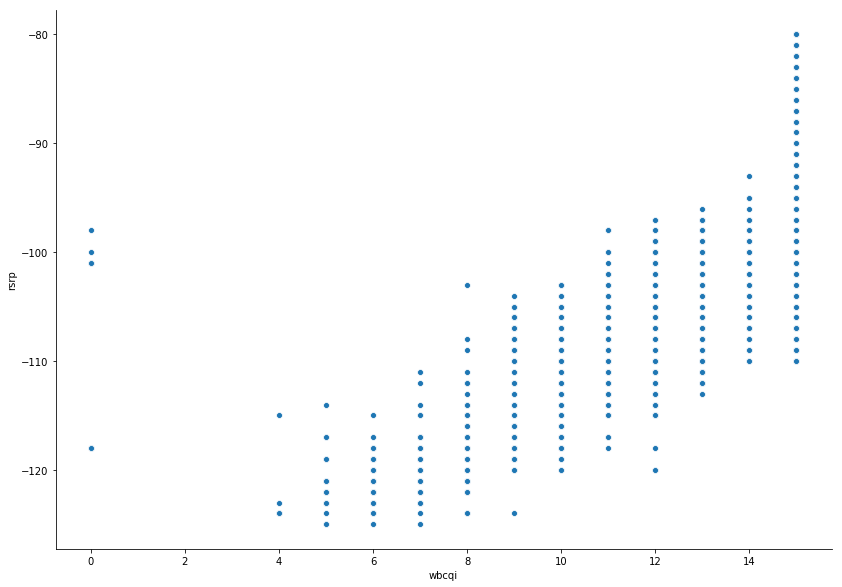

In [24]:
sns.pairplot(x_vars=['wbcqi'], y_vars=['rsrp'], data=data2,height=8.27, aspect=11.7/8.27)
#sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=data1)
plt.show()

[Text(0, 0.5, 'rsrq (db)'), Text(0.5, 0, 'timestamps')]

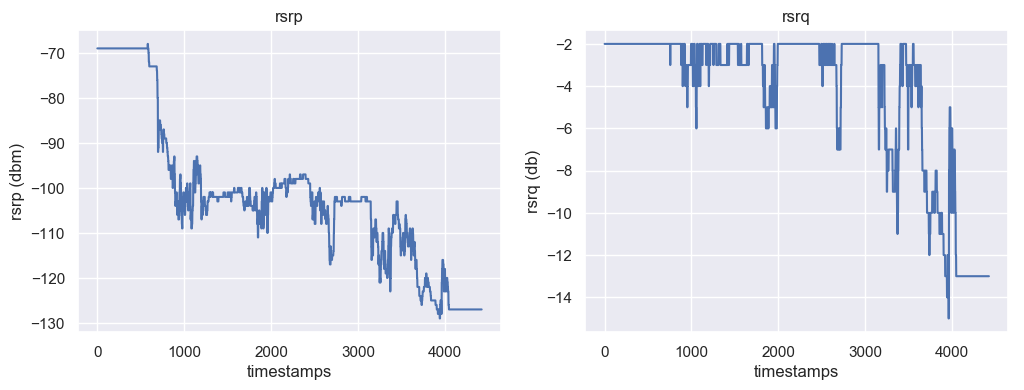

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4), dpi=100)
axes[0].plot(data1['date_index'], data1['rsrp'])
axes[0].set_title("rsrp")
axes[0].set(xlabel='timestamps', ylabel='rsrp (dbm)')
axes[1].plot(data1['date_index'], data1['rsrq'])
axes[1].set_title("rsrq")
axes[1].set(xlabel='timestamps', ylabel='rsrq (db)')


[Text(0, 0.5, 'wbcqi'), Text(0.5, 0, 'rsrq(db)')]

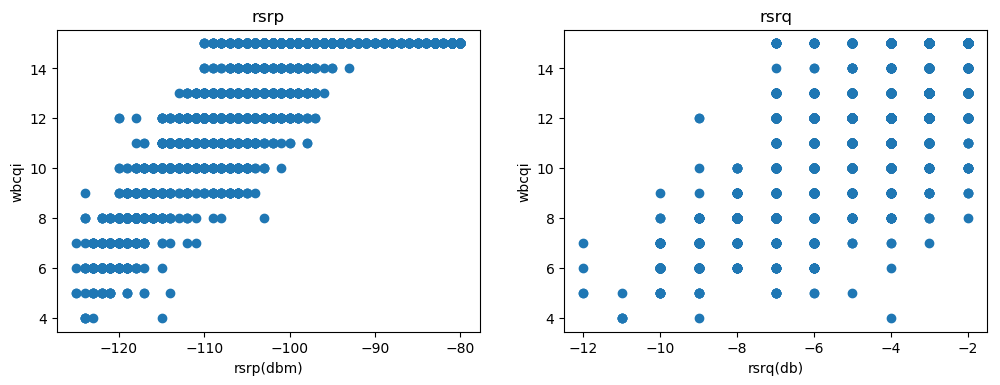

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4), dpi=100)
axes[0].plot(data2['rsrp'], data2['wbcqi'],'o')
axes[0].set_title("rsrp")
axes[0].set(xlabel='rsrp(dbm)', ylabel='wbcqi')
axes[1].plot(data2['rsrq'], data2['wbcqi'],'o')
axes[1].set_title("rsrq")
axes[1].set(xlabel='rsrq(db)', ylabel='wbcqi')

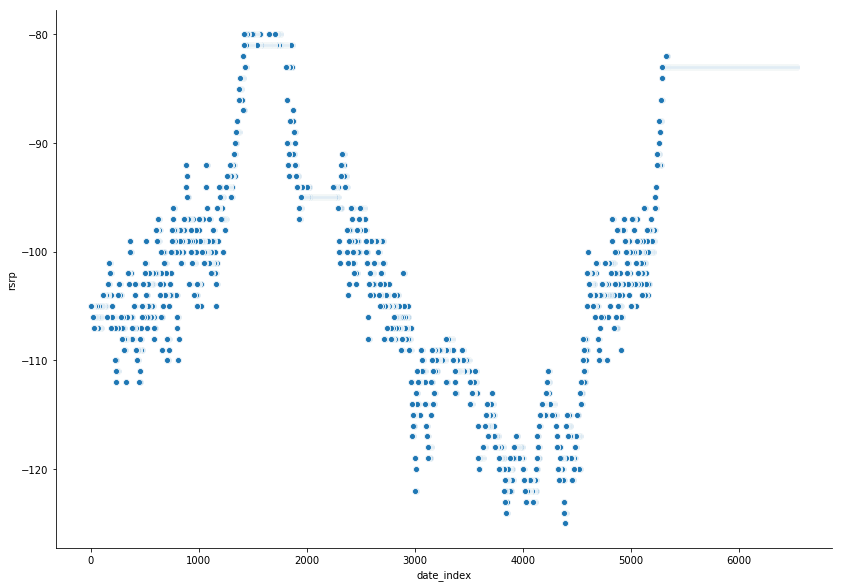

In [160]:
sns.pairplot(x_vars=['date_index'], y_vars=['rsrp'], data=data2,height=8.27, aspect=11.7/8.27)
#sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=data1)
plt.show()

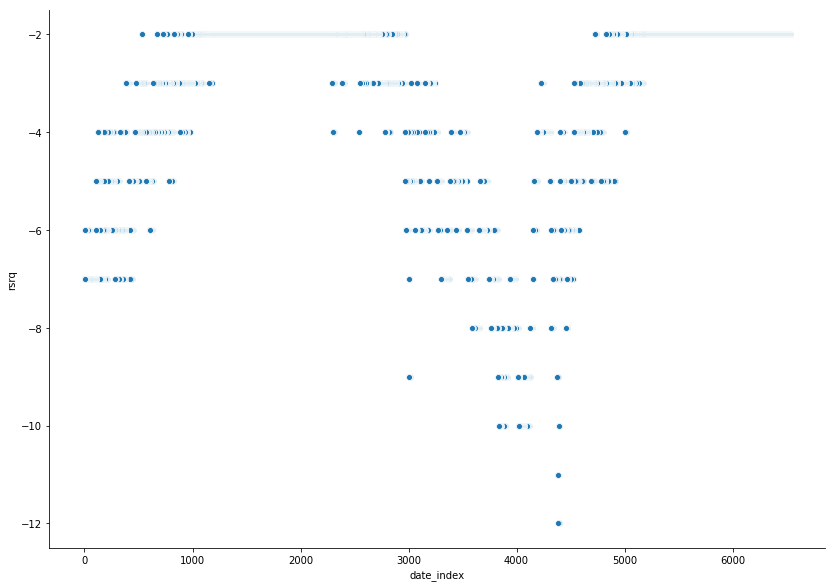

In [161]:
sns.pairplot(x_vars=['date_index'], y_vars=['rsrq'], data=data2,height=8.27, aspect=11.7/8.27)
#sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=data1)
plt.show()

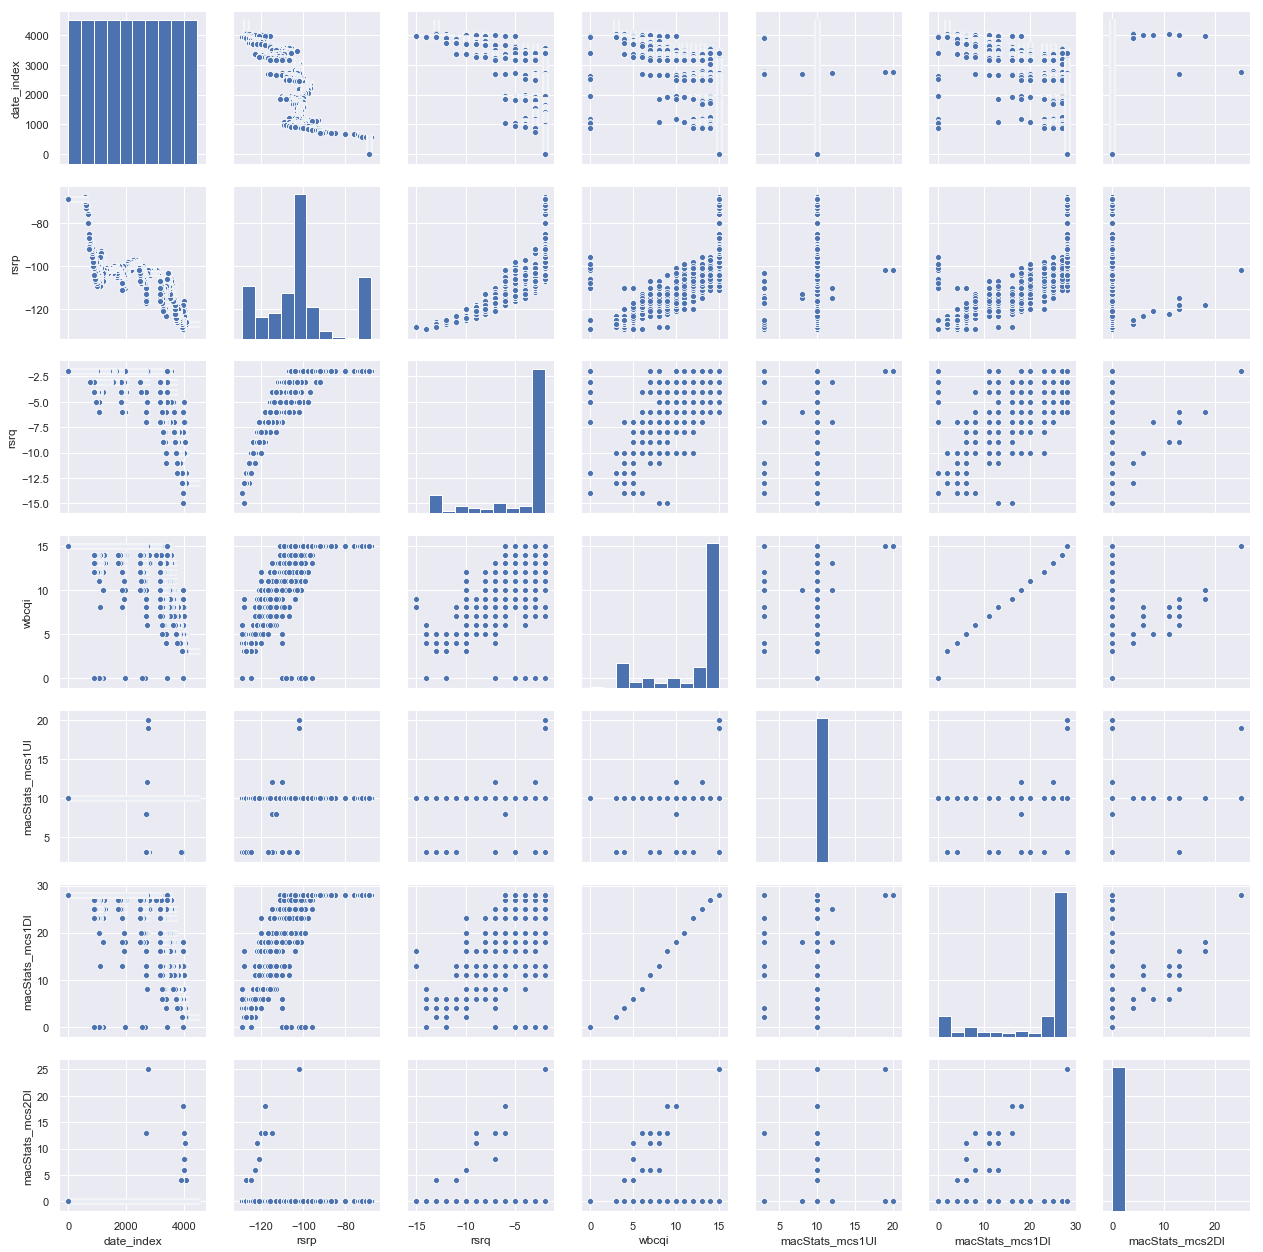

In [80]:
sns.pairplot(data2)

In [14]:
data2.to_csv('closerfarcloser3.csv')

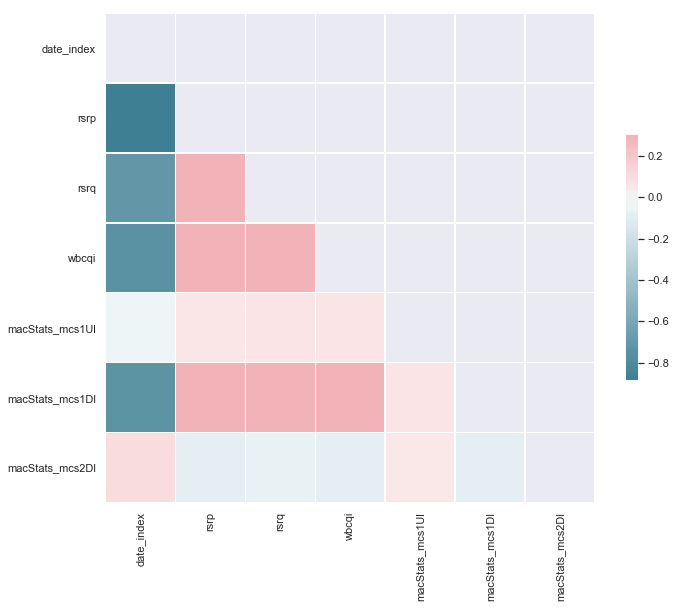

In [81]:
# Compute the correlation matrix
corr = data2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [82]:
data1.to_csv('4gV5gRAN.data_exp.1.csv')
data2.to_csv('4gV5gRAN.data_exp.2.csv')

In [1]:
data3=data1[['date_index', 'rsrp','rsrq','wbcqi','macStats_mcs2Dl']]
data3.head()

NameError: name 'data1' is not defined

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4), dpi=100)
#try to do distribution for some of the columns
axes[0].plot(data1['date_index'], data1['rsrp'])
axes[0].set_title("rsrp")

axes[1].plot(data1['date_index'], data1['rsrq'])
axes[1].set_title("rsrq")